# NETFLIX EDA





## Import Libraries

In [1]:
#Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import datetime

%matplotlib inline


/Users/tddagdas/opt/anaconda3/envs/Main/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# 1A. Load Aggregate Info Data

## 1A.1 Use pandas
> ##### To Do
* Programmatically download and load the data into a pandas dataframe.
* Report how many rows and columns of data you have loaded.

In [2]:
#Load the aggregate information data
df = pd.read_csv('netflix_titles.csv')

In [3]:
#Number of rows and columns
num_rows, num_columns = df.shape
print('#columns: ', num_columns)
print('#rows: ', num_rows)


#columns:  12
#rows:  7787


# 2A. Exploratory Data Analysis

## 2A.1 Understanding data columns
> ##### To Do
* Identify columns (e.g., numerical, categorical, date and time)
* Identify data and time columns. Convert these to `datetime`. 


In [4]:
#First few rows of the data
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [6]:
#Check if there is any duplicated value
df.duplicated().sum() 

0

## 2A.2 Identify issues with data
> ##### To Do
* Look at the columns and identify data issues (missing values, outliers, wrong data, etc). 
* Look at the descriptive statistics. Make use of pandas.dataframe.describe().
* Study time related columns and identify any existing issues.

In [7]:
#Missing cases
df.isna().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [8]:
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

# 3A. Data Wrangling and Visualization

In [9]:
df.isna().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [10]:
#fill the missing cases

df['director'].fillna('no director', inplace = True)
df['cast'].fillna('no cast', inplace = True)
df['country'].fillna('no country', inplace = True)
df['rating'].fillna('no rating', inplace = True)

In [11]:
# drop missing cases in date added and rating since there are few cases
df.dropna(subset=["date_added", "rating"], inplace=True)

In [12]:
# drop show_id column
#df.drop("show_id",axis=1,inplace=True)

In [13]:
# Check the data again
df.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [14]:
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [15]:
# convert date_added to datetime
df['date_added'] = pd.to_datetime(df['date_added'])

#df['release_year'] = pd.to_datetime(df['release_year'],format='%Y')

In [16]:
df.dtypes

show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
dtype: object

In [17]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,no director,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [18]:
df.shape

(7777, 12)

In [19]:
#df.describe()

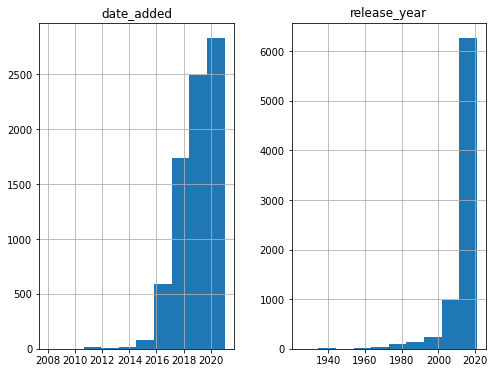

In [20]:
df.hist(figsize = (8, 6));

In [21]:
# Value counts of type column
df['type'].value_counts()

Movie      5377
TV Show    2400
Name: type, dtype: int64

Text(0.5, 1.0, 'Percent of TV Shows and Movies on Netflix')

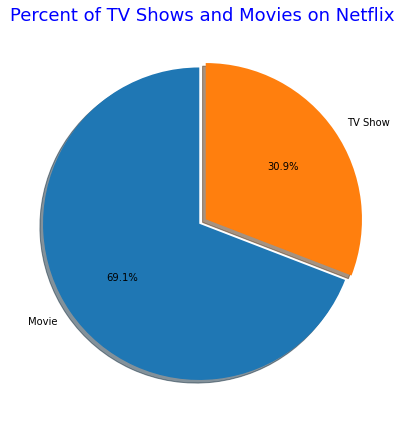

In [22]:
plt.figure(figsize=(7,9))
plt.pie(df.type.value_counts(),explode=(0.025,0.025), labels=df.type.value_counts().index,
            autopct='%1.1f%%',shadow=True, startangle=90)
plt.title('Percent of TV Shows and Movies on Netflix', color='blue', fontsize=18)

In [23]:
#unique values of duration
df['duration'].unique()

array(['4 Seasons', '93 min', '78 min', '80 min', '123 min', '1 Season',
       '95 min', '119 min', '118 min', '143 min', '103 min', '89 min',
       '91 min', '149 min', '144 min', '124 min', '87 min', '110 min',
       '128 min', '117 min', '100 min', '2 Seasons', '84 min', '99 min',
       '90 min', '102 min', '104 min', '105 min', '56 min', '125 min',
       '81 min', '97 min', '106 min', '107 min', '109 min', '44 min',
       '75 min', '101 min', '3 Seasons', '37 min', '113 min', '114 min',
       '130 min', '94 min', '140 min', '135 min', '82 min', '70 min',
       '121 min', '92 min', '164 min', '53 min', '83 min', '116 min',
       '86 min', '120 min', '96 min', '126 min', '129 min', '77 min',
       '137 min', '148 min', '28 min', '122 min', '176 min', '85 min',
       '22 min', '68 min', '111 min', '29 min', '142 min', '168 min',
       '21 min', '59 min', '20 min', '98 min', '108 min', '76 min',
       '26 min', '156 min', '30 min', '57 min', '150 min', '133 min',
       '1

In [24]:
# Subset the data for Movie type

movies = df[df['type'] == 'Movie']
movies.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,2020-06-01,2019,TV-MA,95 min,"Horror Movies, International Movies","After an awful accident, a couple admitted to ..."


In [25]:
# Movies duration in minutes

movies['duration']=movies['duration'].str.replace(' min','')
movies['duration']=movies['duration'].astype(str).astype(int)
movies['duration']

/Users/tddagdas/opt/anaconda3/envs/Main/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/tddagdas/opt/anaconda3/envs/Main/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


1        93
2        78
3        80
4       123
6        95
       ... 
7781     88
7782     99
7783    111
7784     44
7786     90
Name: duration, Length: 5377, dtype: int64

Text(0.5, 1.0, 'Duration of Movies on Netflix')

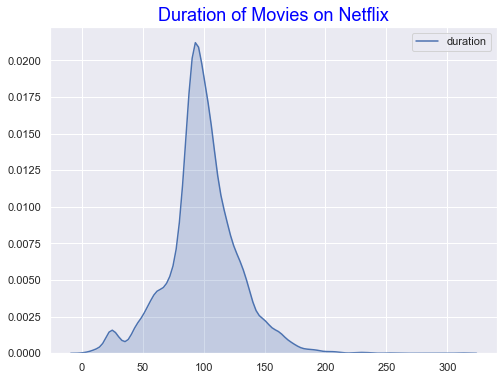

In [26]:
plt.figure(figsize=(8,6))
sns.set(style="darkgrid")
sns.kdeplot(data=movies['duration'],shade=True)
plt.title('Duration of Movies on Netflix', color='blue', fontsize=18)

In [27]:
movies_1=['title','duration']

movies_duration = movies[movies_1]
movies['duration']

1        93
2        78
3        80
4       123
6        95
       ... 
7781     88
7782     99
7783    111
7784     44
7786     90
Name: duration, Length: 5377, dtype: int64

In [28]:
# Max and min duration
print('The max duration is ', max(movies.duration))
print('The min duration is ', min(movies.duration))

The max duration is  312
The min duration is  3


In [29]:
# Average movie duration
print(movies['duration'].mean())

99.30797842663195


In [30]:
# average movie duration by year
avg_movie_time_by_year = movies.groupby(['release_year']).mean()
avg_movie_time_by_year

,duration
release_year,
1942,35.000000
1943,62.666667
1944,52.000000
1945,51.333333
1946,58.000000
...,...
2017,94.836022
2018,96.170300
2019,93.457045


In [31]:
# Look at the movies title and duration
movies_duration = movies_duration.sort_values(by='duration',ascending=False)
movies_duration

,title,duration
957,Black Mirror: Bandersnatch,312
6850,The School of Mischief,253
4490,No Longer kids,237
3694,Lock Your Girls In,233
5108,Raya and Sakina,230
...,...,...
463,American Factory: A Conversation with the Obamas,10
1203,Canvas,9
1501,Cops and Robbers,8
5694,Sol Levante,5


In [32]:
movies_duration.head()

,title,duration
957,Black Mirror: Bandersnatch,312
6850,The School of Mischief,253
4490,No Longer kids,237
3694,Lock Your Girls In,233
5108,Raya and Sakina,230


In [33]:
movies_count = movies_duration.groupby('duration').count()
movies_count

,title
duration,
3,1
5,1
8,1
9,1
10,1
...,...
230,1
233,1
237,1


In [34]:
first_10_movies = movies_duration[0:10]
first_10_movies

,title,duration
957,Black Mirror: Bandersnatch,312
6850,The School of Mischief,253
4490,No Longer kids,237
3694,Lock Your Girls In,233
5108,Raya and Sakina,230
5376,Sangam,228
3521,Lagaan,224
3195,Jodhaa Akbar,214
6507,The Irishman,209
3282,Kabhi Khushi Kabhie Gham,209


Text(0.5, 1.0, 'Duration of Movies on Netflix')

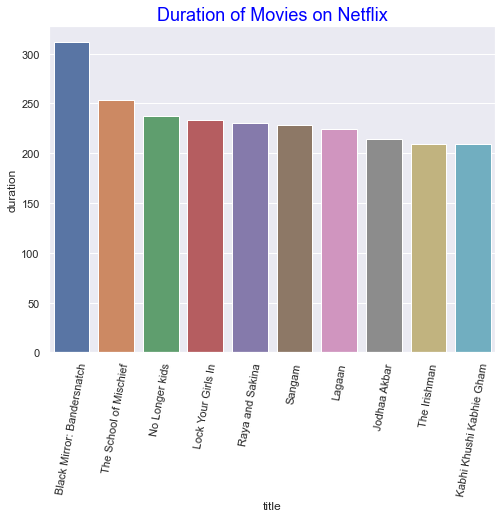

In [35]:
plt.figure(figsize=(8,6))
sns.barplot(x='title',y='duration', palette="deep", data=first_10_movies)
plt.xticks(rotation=80)
plt.title('Duration of Movies on Netflix',color='blue', fontsize=18)


In [36]:
# Subset the data for TV Show type
tv_shows = df[df['type']=='TV Show']
tv_shows.head()



,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,no director,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,2017-07-01,2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...
11,s12,TV Show,1983,no director,"Robert Więckiewicz, Maciej Musiał, Michalina O...","Poland, United States",2018-11-30,2018,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas","In this dark alt-history thriller, a naïve law..."
12,s13,TV Show,1994,Diego Enrique Osorno,no cast,Mexico,2019-05-17,2019,TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S...",Archival video and new interviews examine Mexi...
16,s17,TV Show,Feb-09,no director,"Shahd El Yaseen, Shaila Sabt, Hala, Hanadi Al-...",no country,2019-03-20,2018,TV-14,1 Season,"International TV Shows, TV Dramas","As a psychology professor faces Alzheimer's, h..."


In [37]:
# TV shows duration by number of seasons

tv_shows['duration']=tv_shows['duration'].str.replace(' Season','')
tv_shows['duration']=tv_shows['duration'].str.replace('s','')
tv_shows['duration']=tv_shows['duration'].astype(str).astype(int)
tv_shows['duration']

/Users/tddagdas/opt/anaconda3/envs/Main/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/tddagdas/opt/anaconda3/envs/Main/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/tddagdas/opt/anaconda3/envs/Main/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:

0       4
5       1
11      1
12      1
16      1
       ..
7767    1
7775    1
7777    2
7779    1
7785    1
Name: duration, Length: 2400, dtype: int64

In [38]:
# Max and min duration of TV shows
print('The max duration is ', max(tv_shows.duration))
print('The min duration is ', min(tv_shows.duration))

The max duration is  16
The min duration is  1


In [39]:
# average Tv show season duration

print(tv_shows['duration'].mean())

1.7608333333333333


In [40]:
tv_shows_1=['title','duration']

tv_shows_duration = tv_shows[tv_shows_1]

In [41]:
tv_shows_duration = tv_shows_duration.sort_values(by='duration',ascending=False)
tv_shows_duration


,title,duration
2538,Grey's Anatomy,16
5912,Supernatural,15
4438,NCIS,15
1471,COMEDIANS of the world,13
1537,Criminal Minds,12
...,...,...
3563,Learning Songs by Little Baby Bum: Nursery Rhy...,1
3550,Laws of Attraction,1
3548,Lavender,1
610,Atelier,1


In [42]:
tv_shows_duration.head()

,title,duration
2538,Grey's Anatomy,16
5912,Supernatural,15
4438,NCIS,15
1471,COMEDIANS of the world,13
1537,Criminal Minds,12


In [43]:
# Number of Tv shows by season

tv_duration_count = tv_shows_duration.groupby('duration').count()
tv_duration_count

,title
duration,
1,1608
2,378
3,183
4,86
5,57
6,30
7,19
8,18
9,8


In [44]:
first_10_tvshows = tv_shows_duration[0:10]
first_10_tvshows

,title,duration
2538,Grey's Anatomy,16
5912,Supernatural,15
4438,NCIS,15
1471,COMEDIANS of the world,13
1537,Criminal Minds,12
7169,Trailer Park Boys,12
2678,Heartland,11
1300,Cheers,11
1597,Danger Mouse: Classic Collection,10
5538,Shameless (U.S.),10


Text(0.5, 1.0, 'Duration of TV Shows on Netflix')

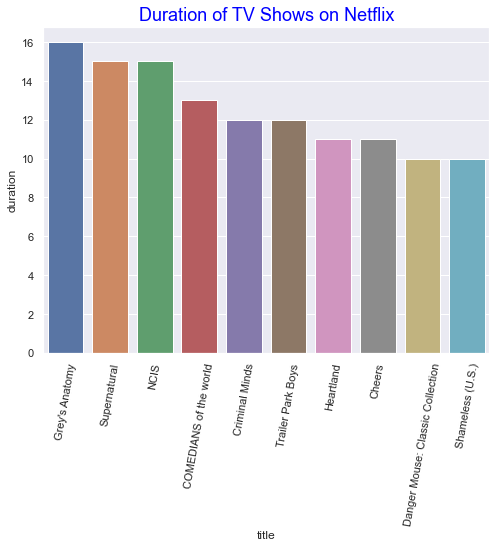

In [45]:
plt.figure(figsize=(8,6))
sns.barplot(x='title',y='duration', palette="deep", data=first_10_tvshows)
plt.xticks(rotation=80)
plt.title('Duration of TV Shows on Netflix',color='blue', fontsize=18)

In [46]:
# Values and counts in rating column in all data

df['rating'].value_counts()

TV-MA        2861
TV-14        1928
TV-PG         804
R             665
PG-13         386
TV-Y          279
TV-Y7         270
PG            247
TV-G          194
NR             83
G              39
no rating       7
TV-Y7-FV        6
UR              5
NC-17           3
Name: rating, dtype: int64

In [47]:
# Values and counts in rating column in movies
movies['rating'].value_counts()

TV-MA        1845
TV-14        1272
R             663
TV-PG         505
PG-13         386
PG            247
TV-Y          117
TV-G          111
TV-Y7          95
NR             79
G              39
TV-Y7-FV        5
UR              5
no rating       5
NC-17           3
Name: rating, dtype: int64

In [48]:
# Values and counts in rating column in tvshows

tv_shows['rating'].value_counts()

TV-MA        1016
TV-14         656
TV-PG         299
TV-Y7         175
TV-Y          162
TV-G           83
NR              4
no rating       2
R               2
TV-Y7-FV        1
Name: rating, dtype: int64

Text(0.5, 1.0, 'Ratings of TV Shows and Movies on Netflix')

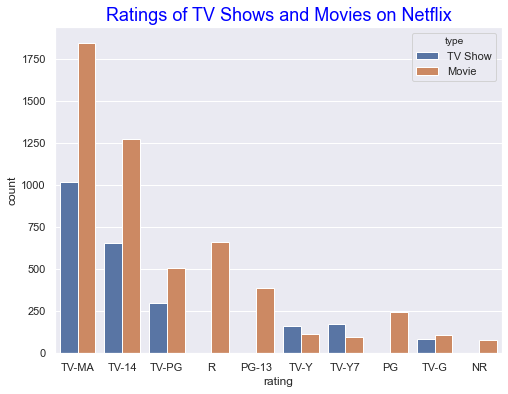

In [49]:
plt.figure(figsize=(8,6))
sns.set(style="darkgrid")
sns.countplot(x="rating", data= df, palette="deep", order= df['rating'].value_counts().index[0:10],hue=df['type'])
plt.title('Ratings of TV Shows and Movies on Netflix',color='blue', fontsize=18)

In [50]:
df.rating.value_counts()

TV-MA        2861
TV-14        1928
TV-PG         804
R             665
PG-13         386
TV-Y          279
TV-Y7         270
PG            247
TV-G          194
NR             83
G              39
no rating       7
TV-Y7-FV        6
UR              5
NC-17           3
Name: rating, dtype: int64

In [51]:
#Creating age categories in Ratings : adults , teens , kids

age_group = {
    'TV-PG': 'Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Kids',
    'TV-Y7': 'Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults',
    'no rating':'Adults'
}  

In [52]:
#replace the ratings with age group category

df['age_group'] = df['rating'].replace(age_group)  
df['age_group'].unique() 

array(['Adults', 'Teens', 'Kids'], dtype=object)

In [53]:
# Check the value counts of age group

df.age_group.value_counts()

Adults    3624
Teens     2314
Kids      1839
Name: age_group, dtype: int64

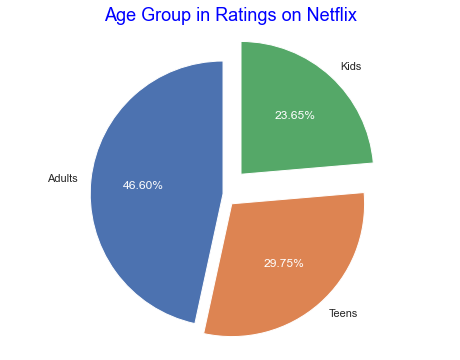

In [54]:
plt.figure(figsize=(8,6))
labels=['Adults', 'Teens', 'Kids']
_, _, texts = plt.pie(df.age_group.value_counts()[:3], labels=labels, autopct='%1.2f%%', startangle=90, 
                      explode=(0.0, 0.1, 0.2))
plt.axis('equal')
plt.title('Age Group in Ratings on Netflix', color='blue',fontsize=18);
for text in texts:
    text.set_color('white')

In [55]:
# Value counts of date added

df['date_added'].value_counts()


2020-01-01    119
2019-11-01     96
2018-03-01     76
2019-12-31     76
2018-10-01     72
             ... 
2017-05-04      1
2017-03-23      1
2017-11-25      1
2017-10-30      1
2019-08-22      1
Name: date_added, Length: 1512, dtype: int64

In [56]:
df['date_added'] = pd.to_datetime(df['date_added'])
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month
#df['day_added'] = df['date_added'].dt.day
df['day_added'] = df['date_added'].dt.weekday
df['year_added'].astype('int')
df['month_added'].astype('int')
df['day_added'].astype('int')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,age_group,year_added,month_added,day_added
0,s1,TV Show,3%,no director,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,Adults,2020,8,4
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,Adults,2016,12,4
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",Adults,2018,12,3
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",Teens,2017,11,3
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,Teens,2020,1,2


Text(0.5, 1.0, 'TV Shows and Movies by Year added on Netflix')

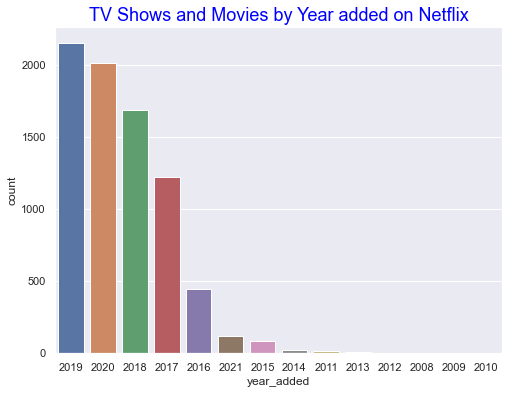

In [57]:
plt.figure(figsize=(8,6))
sns.set(style="darkgrid")
sns.countplot(x='year_added',data=df, palette="deep", order = df['year_added'].value_counts().index)
plt.title("TV Shows and Movies by Year added on Netflix",color='blue', fontsize=18)

Text(0.5, 1.0, 'TV Shows and Movies by Month added on Netflix')

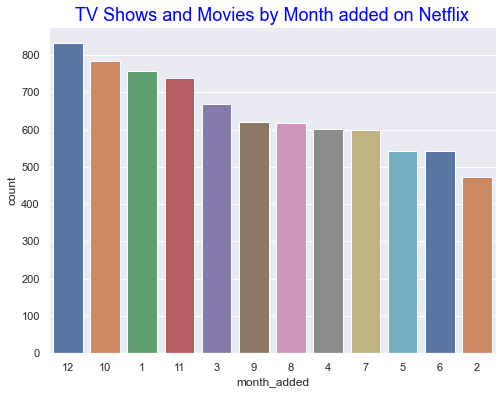

In [58]:
plt.figure(figsize=(8,6))
sns.set(style="darkgrid")
sns.countplot(x='month_added',data=df, palette="deep", order = df['month_added'].value_counts().index)
plt.title("TV Shows and Movies by Month added on Netflix",color='blue', fontsize=18)


Text(0.5, 1.0, 'TV Shows and Movies by Day added on Netflix')

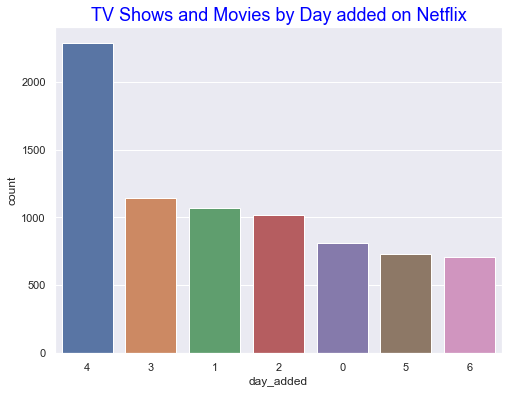

In [59]:
plt.figure(figsize=(8,6))
sns.set(style="darkgrid")
sns.countplot(x='day_added',data=df, palette="deep", order = df['day_added'].value_counts().index)
plt.title("TV Shows and Movies by Day added on Netflix",color='blue', fontsize=18)

In [60]:
year_count = df["release_year"].value_counts().sort_values(ascending=False)
year_count.head(10)

2018    1120
2017    1012
2019     996
2016     881
2020     868
2015     539
2014     334
2013     266
2012     218
2010     172
Name: release_year, dtype: int64

Text(0.5, 1.0, 'Release Years of TV Shows and Movies on Netflix')

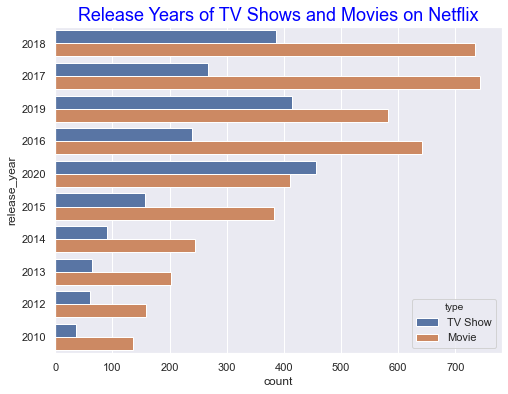

In [61]:
plt.figure(figsize=(8,6))
sns.set(style="darkgrid")
sns.countplot(y="release_year", data= df, palette="deep", order= df['release_year'].value_counts().index[0:10],hue=df['type'])
plt.title('Release Years of TV Shows and Movies on Netflix',color='blue', fontsize=18)

In [62]:
#Creating new categories in Type : old, 90s, Early 21st century, recent
def release(release_date):
    if 1960<=release_date<=1990:
        return 'Old'
    elif 1990<release_date<=2000:
        return '90s'
    elif 2000<release_date<=2015:
        return 'Early 21st century'
    elif 2015<release_date<=2021:
        return 'Recent'
    else:
        return None
df['release_types']=df['release_year'].apply(release)

In [63]:
# Value counts of new categories in type
print(df.groupby('release_types').type.value_counts())


release_types       type   
90s                 Movie       207
                    TV Show      32
Early 21st century  Movie      1820
                    TV Show     566
Old                 Movie       201
                    TV Show      17
Recent              Movie      3125
                    TV Show    1783
Name: type, dtype: int64


Text(0.5, 1.0, 'Release Type of TV Shows and Movies on Netflix')

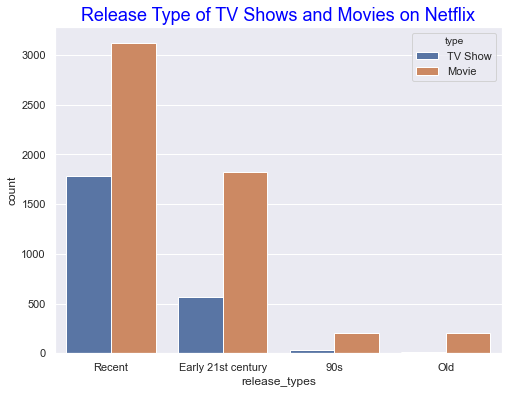

In [64]:
plt.figure(figsize=(8,6))
sns.set(style="darkgrid")
sns.countplot(df['release_types'],hue=df['type'],palette='deep')
plt.title('Release Type of TV Shows and Movies on Netflix',color='blue', fontsize=18)

In [65]:
# Most produced county to least
country_count = df['country'].value_counts().sort_values(ascending=False)
country_count.head(10)


United States     2549
India              923
no country         506
United Kingdom     396
Japan              225
South Korea        183
Canada             177
Spain              134
France             115
Egypt              101
Name: country, dtype: int64

Text(0.5, 1.0, 'Countries Produce TV Shows and Movies on Netflix')

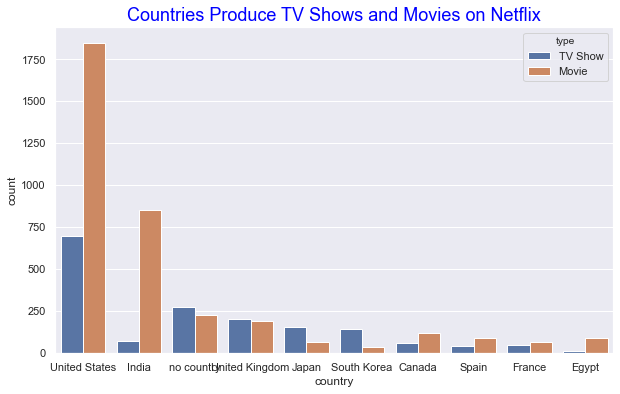

In [66]:
plt.figure(figsize=(10,6))
sns.set(style="darkgrid")
sns.countplot(x="country", data=df, palette="deep", order=df['country'].value_counts().index[0:10],hue=df['type'])
plt.title('Countries Produce TV Shows and Movies on Netflix',color='blue', fontsize=18)

In [67]:
# Count of kind of genres
genre_count = df['listed_in'].value_counts().sort_values(ascending=False)
genre_count.head(10)

Documentaries                                       334
Stand-Up Comedy                                     321
Dramas, International Movies                        320
Comedies, Dramas, International Movies              243
Dramas, Independent Movies, International Movies    215
Kids' TV                                            204
Children & Family Movies                            177
Documentaries, International Movies                 172
Children & Family Movies, Comedies                  169
Comedies, International Movies                      161
Name: listed_in, dtype: int64

Text(0.5, 1.0, 'Top 10 Genre of TV Shows and Movies on Netflix')

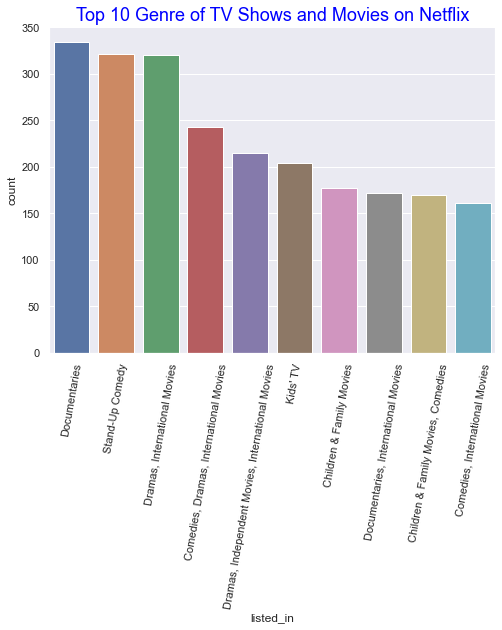

In [68]:
plt.figure(figsize=(8,6))
sns.set(style="darkgrid")
sns.countplot(x="listed_in", data=df, palette="deep", order=df['listed_in'].value_counts().index[0:10])
plt.xticks(rotation=80)
plt.title('Top 10 Genre of TV Shows and Movies on Netflix', color='blue', fontsize=18)

In [69]:
#Most productive director to least
director_count = df['director'].value_counts().sort_values(ascending=False)
director_count.head(10)

no director               2379
Raúl Campos, Jan Suter      18
Marcus Raboy                16
Jay Karas                   14
Cathy Garcia-Molina         13
Youssef Chahine             12
Martin Scorsese             12
Jay Chapman                 12
Steven Spielberg            10
David Dhawan                 9
Name: director, dtype: int64

In [70]:
director_country=['director','country']

director_country = df[director_country]

In [71]:
# director and their counties
director_country = director_country.sort_values(by='country',ascending=False)
director_country

,director,country
1784,no director,no country
1983,"Hugues Nancy, Fabien Beziat",no country
5616,Pascal Amanfo,no country
1968,Federico Lemos,no country
5629,no director,no country
...,...,...
6251,Sebastián Schindel,Argentina
2749,no director,Argentina
92,Nicanor Loreti,Argentina
4870,"Israel Adrián Caetano, Bruno Stagnaro",Argentina


In [72]:
director_country = director_country.groupby('director').count()
director_country

,country
director,
A. L. Vijay,2
A. Raajdheep,1
A. Salaam,1
A.R. Murugadoss,2
Aadish Keluskar,1
...,...
Çagan Irmak,1
Ísold Uggadóttir,1
Óskar Thór Axelsson,1


In [73]:
movies_dir = movies[['director','type']]

                

In [74]:
movies_dir = movies_dir.groupby('director').count()
movies_dir.head()

,type
director,
A. L. Vijay,2
A. Raajdheep,1
A. Salaam,1
A.R. Murugadoss,2
Aadish Keluskar,1


In [75]:
movies = movies[movies['director'] !='no director']
movies['director']

1       Jorge Michel Grau
2            Gilbert Chan
3             Shane Acker
4          Robert Luketic
6         Yasir Al Yasiri
              ...        
7780         Shlok Sharma
7781         Peter Hewitt
7782          Josef Fares
7783          Mozez Singh
7786             Sam Dunn
Name: director, Length: 5214, dtype: object

Text(0.5, 1.0, 'Top 10 Directors of Movies on Netflix')

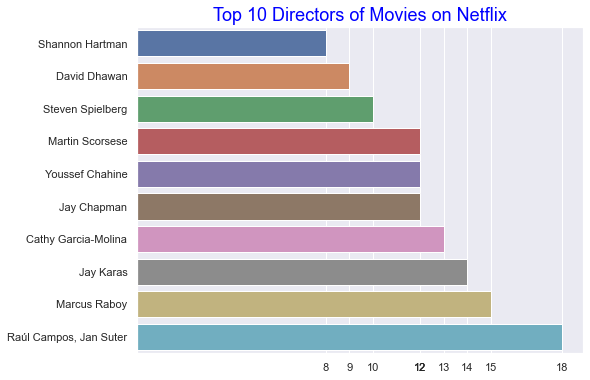

In [76]:
plt.figure(figsize=(8,6))
sns.barplot(y=movies.director.value_counts()[:10].sort_values().index, x=movies.director.value_counts()[:10].sort_values().values);
plt.xticks(movies.director.value_counts()[:10].sort_values().values);
plt.title('Top 10 Directors of Movies on Netflix',color='blue', fontsize=18)

In [77]:
tv_show = tv_shows[tv_shows['director'] !='no director']
tv_show['director']



5                         Serdar Akar
12               Diego Enrique Osorno
132                       Nizar Shafi
195     Steven Bognar, Julia Reichert
218                      Carla Barros
                    ...              
7385                    Inma Torrente
7400                     Carlos Sedes
7492                       Noam Murro
7666                   Iginio Straffi
7721               Lee Toland Krieger
Name: director, Length: 184, dtype: object

Text(0.5, 1.0, 'Top 10 Directors of TV Shows on Netflix')

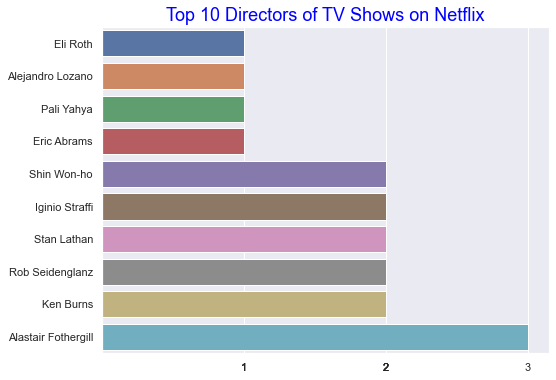

In [78]:
plt.figure(figsize=(8,6))
sns.barplot(y=tv_show.director.value_counts()[:10].sort_values().index, x=tv_show.director.value_counts()[:10].sort_values().values);
plt.xticks(tv_show.director.value_counts()[:10].sort_values().values);
plt.title('Top 10 Directors of TV Shows on Netflix',color='blue', fontsize=18)